In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
%cd D:\data\Customer Clustering

D:\data\Customer Clustering


In [3]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is 0676-C2E1

 Directory of D:\data\Customer Clustering

09/24/2022  07:55 PM    <DIR>          .
09/24/2022  07:55 PM    <DIR>          ..
05/07/2021  12:17 PM            11,528 segmentation data legend.xlsx
05/07/2021  12:17 PM            61,519 segmentation data.csv
               2 File(s)         73,047 bytes
               2 Dir(s)  374,985,883,648 bytes free


In [4]:
# read data
df = pd.read_csv('segmentation data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
df.shape

(2000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
# unique values in each column
for col in df.columns:
    if col == 'ID':
        continue
    else :
        print('unique values in {} are {}'.format(col, df[col].unique()))
        print()

unique values in Sex are [0 1]

unique values in Marital status are [0 1]

unique values in Age are [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59 73 72 76 71 18]

unique values in Education are [2 1 0 3]

unique values in Income are [124670 150773  89210 ...  86400  97968  68416]

unique values in Occupation are [1 0 2]

unique values in Settlement size are [2 0 1]



In [8]:
# convert cols to category
# cols with unique values less than 10
mask = df.nunique() < 10
cols = df.columns[mask]
df[cols] = df[cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2000 non-null   int64   
 1   Sex              2000 non-null   category
 2   Marital status   2000 non-null   category
 3   Age              2000 non-null   int64   
 4   Education        2000 non-null   category
 5   Income           2000 non-null   int64   
 6   Occupation       2000 non-null   category
 7   Settlement size  2000 non-null   category
dtypes: category(5), int64(3)
memory usage: 57.5 KB


In [9]:
# data description
df.describe()

,ID,Age,Income
count,2.000000e+03,2000.000000,2000.000000
mean,1.000010e+08,35.909000,120954.419000
std,5.774946e+02,11.719402,38108.824679
min,1.000000e+08,18.000000,35832.000000
25%,1.000005e+08,27.000000,97663.250000
50%,1.000010e+08,33.000000,115548.500000
75%,1.000015e+08,42.000000,138072.250000
max,1.000020e+08,76.000000,309364.000000


In [10]:
# data exploration
# check for missing values
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [11]:
# check for duplicates
df.duplicated().sum()

0

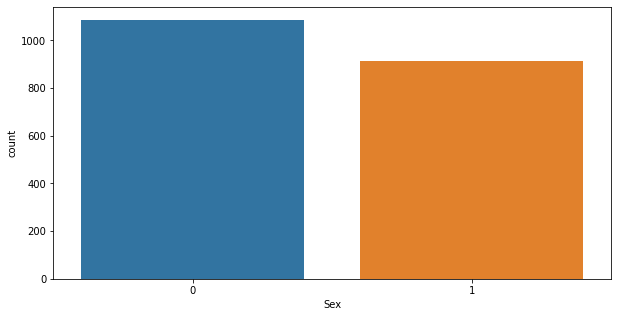

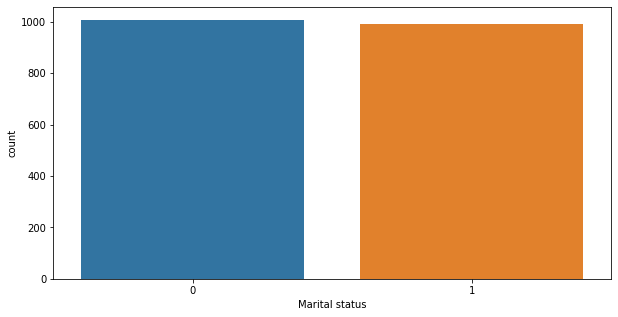

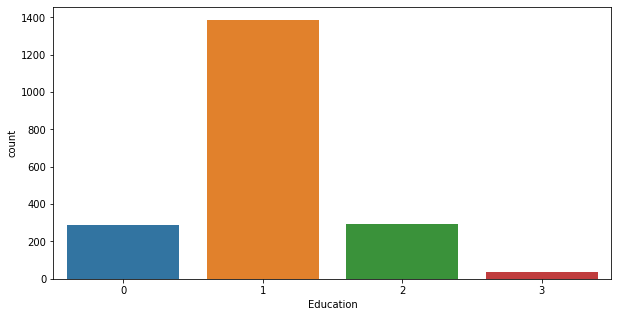

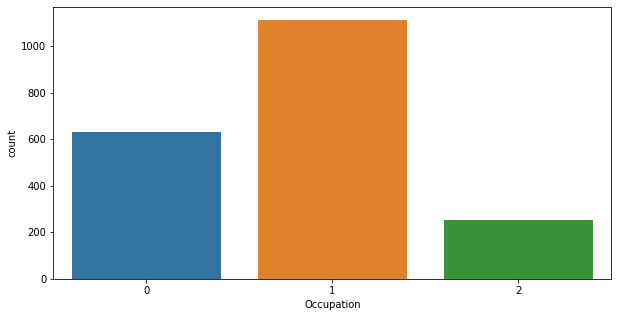

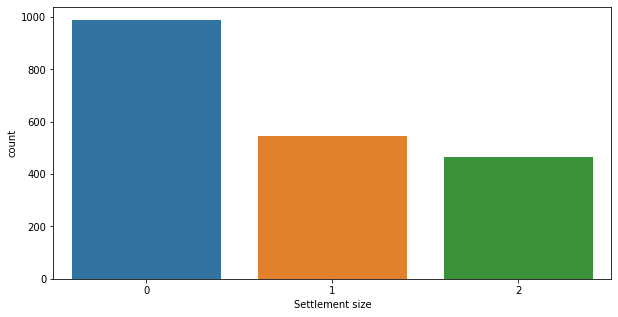

In [12]:
# data visualization
# distribution of each column
# categorical columns
cat_cols = df.select_dtypes('category').columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.show()

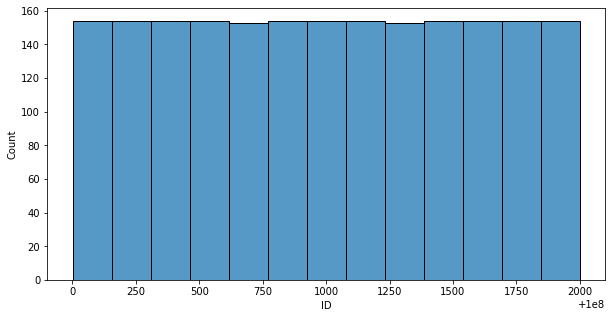

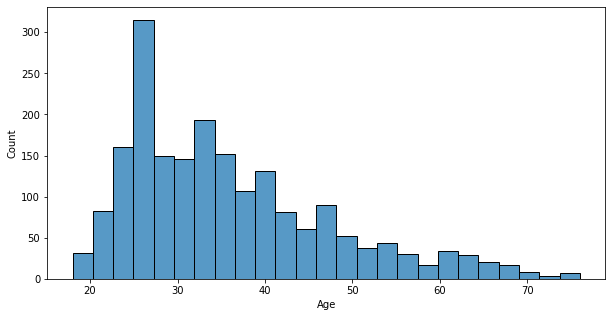

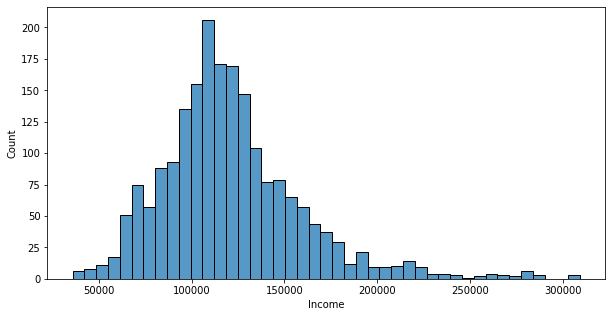

In [13]:
# numerical columns
num_cols = df.select_dtypes('number').columns
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=col, data=df)
    plt.show()

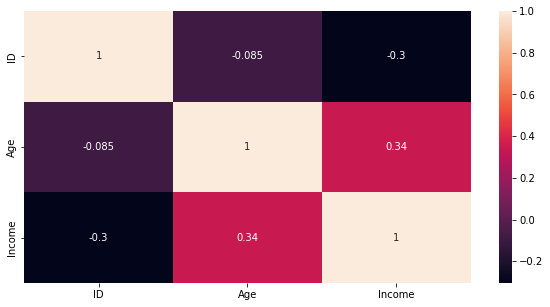

In [14]:
# correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
# drop ID column
df.drop('ID', axis=1, inplace=True)

In [16]:
# data preprocessing
# MinMaxScaler for numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = df.select_dtypes('number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [17]:
# get dummies for categorical columns
df = pd.get_dummies(df, drop_first=True)

df.head()

,Age,Income,Sex_1,Marital status_1,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,Settlement size_1,Settlement size_2
0,0.844828,0.324781,0,0,0,1,0,1,0,0,1
1,0.068966,0.420210,1,1,1,0,0,1,0,0,1
2,0.534483,0.195144,0,0,1,0,0,0,0,0,0
3,0.465517,0.496223,0,0,1,0,0,1,0,1,0
4,0.603448,0.413842,0,0,1,0,0,1,0,1,0


In [18]:
df.shape

(2000, 11)

In [19]:
# df columns
df.columns

Index(['Age', 'Income', 'Sex_1', 'Marital status_1', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2'],
      dtype='object')

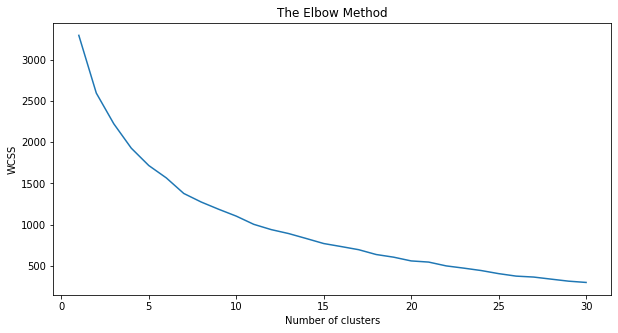

In [20]:
# k-means clustering
# elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

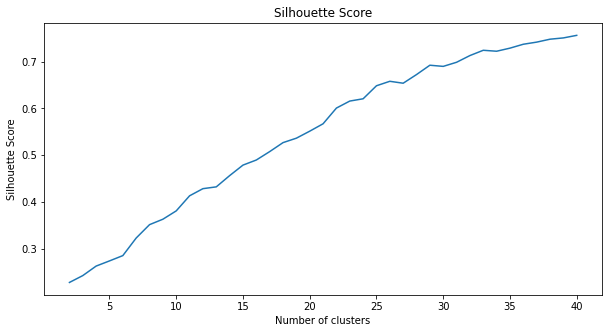

In [21]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 41):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))
plt.figure(figsize=(10, 5))
plt.plot(range(2, 41), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [42]:
# k-means clustering
kmeans = KMeans(n_clusters=35, random_state=42)
kmeans.fit(df)
labels_k = kmeans.labels_

# copy of df
df_copy = df.copy()

# add labels to df
df_copy['labels'] = labels_k

df_copy.head()

,Age,Income,Sex_1,Marital status_1,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,Settlement size_1,Settlement size_2,labels
0,0.844828,0.324781,0,0,0,1,0,1,0,0,1,15
1,0.068966,0.420210,1,1,1,0,0,1,0,0,1,14
2,0.534483,0.195144,0,0,1,0,0,0,0,0,0,10
3,0.465517,0.496223,0,0,1,0,0,1,0,1,0,7
4,0.603448,0.413842,0,0,1,0,0,1,0,1,0,7


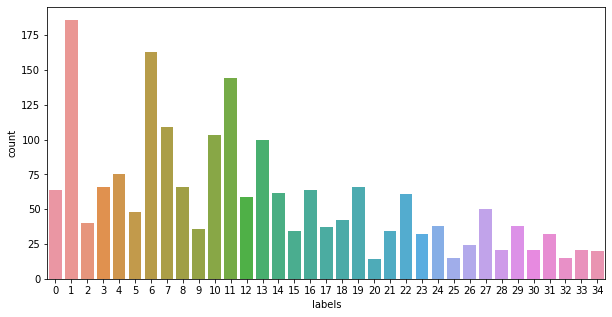

In [25]:
# data visualization
# distribution of labels
plt.figure(figsize=(10, 5))
sns.countplot(x='labels', data=df_copy)
plt.show()

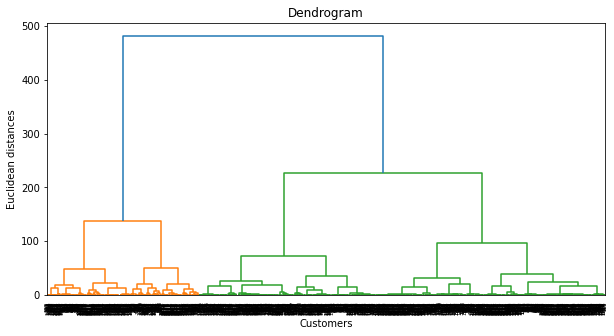

In [ ]:
# heirarchical clustering
# dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# agglo clustering with different linkage methods
from sklearn.cluster import AgglomerativeClustering
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=35, affinity='euclidean', linkage=method)
    labels = hc.fit_predict(df)
    print('Silhouette Score for {} linkage method is {}'.format(method, silhouette_score(df, labels)))

Silhouette Score for ward linkage method is 0.7334508003610372
Silhouette Score for complete linkage method is 0.5678510574767647
Silhouette Score for average linkage method is 0.5104593959918555
Silhouette Score for single linkage method is -0.03876371486356147


In [43]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=35, affinity='euclidean', linkage='ward')
labels_agg = hc.fit_predict(df)

In [44]:
# copy of df
df_copy_agg = df.copy()

# add labels to df
df_copy_agg['labels'] = labels_agg

df_copy_agg.head()

,Age,Income,Sex_1,Marital status_1,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,Settlement size_1,Settlement size_2,labels
0,0.844828,0.324781,0,0,0,1,0,1,0,0,1,33
1,0.068966,0.420210,1,1,1,0,0,1,0,0,1,26
2,0.534483,0.195144,0,0,1,0,0,0,0,0,0,18
3,0.465517,0.496223,0,0,1,0,0,1,0,1,0,21
4,0.603448,0.413842,0,0,1,0,0,1,0,1,0,21


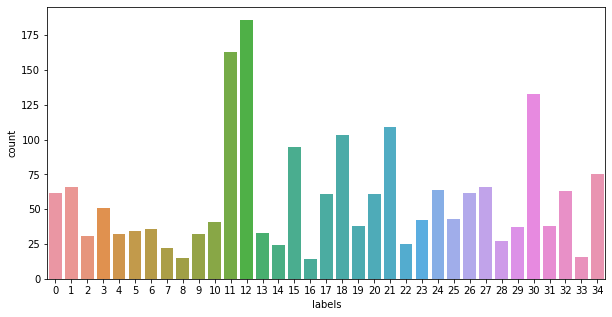

In [32]:
# data visualization
# distribution of labels
plt.figure(figsize=(10, 5))
sns.countplot(x='labels', data=df_copy_agg)
plt.show()

In [45]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(df)

# silhouette score
silhouette_score(df, labels_dbscan)

0.8105168796808293

In [46]:
# copy of df
df_copy_dbscan = df.copy()

# add labels to df
df_copy_dbscan['labels'] = labels_dbscan

df_copy_dbscan.head()


,Age,Income,Sex_1,Marital status_1,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,Settlement size_1,Settlement size_2,labels
0,0.844828,0.324781,0,0,0,1,0,1,0,0,1,0
1,0.068966,0.420210,1,1,1,0,0,1,0,0,1,1
2,0.534483,0.195144,0,0,1,0,0,0,0,0,0,2
3,0.465517,0.496223,0,0,1,0,0,1,0,1,0,3
4,0.603448,0.413842,0,0,1,0,0,1,0,1,0,3


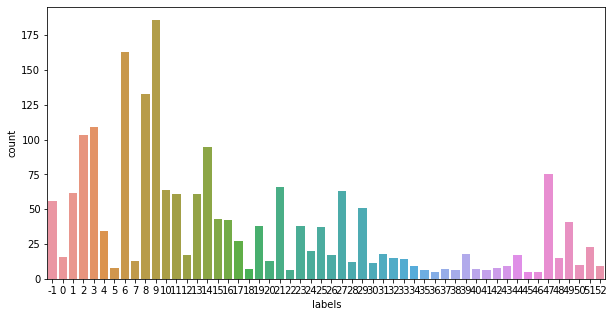

In [36]:
# data visualization
# distribution of labels
plt.figure(figsize=(10, 5))
sns.countplot(x='labels', data=df_copy_dbscan)
plt.show()

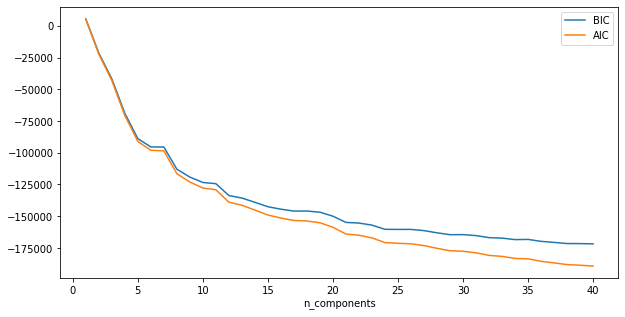

In [37]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
# best number of clusters
n_components = np.arange(1, 41)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(df) for n in n_components]
plt.figure(figsize=(10, 5))
plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

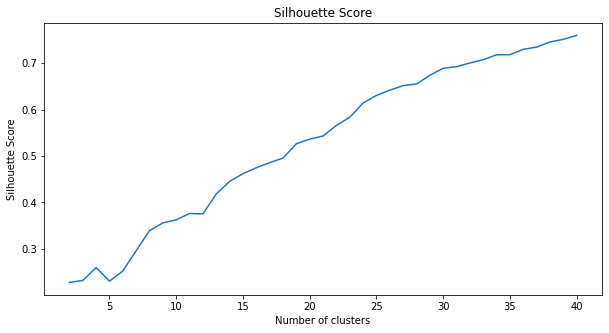

In [38]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 41):
    gmm = GaussianMixture(i, covariance_type='full', random_state=42)
    gmm.fit(df)
    labels = gmm.predict(df)
    silhouette_scores.append(silhouette_score(df, labels))
plt.figure(figsize=(10, 5))
plt.plot(range(2, 41), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [47]:
# Gaussian Mixture Model
gmm = GaussianMixture(35, covariance_type='full', random_state=42)
gmm.fit(df)
labels_gmm = gmm.predict(df)

In [48]:
# copy of df
df_copy_gmm = df.copy()

# add labels to df
df_copy_gmm['labels'] = labels_gmm

df_copy_gmm.head()

,Age,Income,Sex_1,Marital status_1,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,Settlement size_1,Settlement size_2,labels
0,0.844828,0.324781,0,0,0,1,0,1,0,0,1,25
1,0.068966,0.420210,1,1,1,0,0,1,0,0,1,21
2,0.534483,0.195144,0,0,1,0,0,0,0,0,0,3
3,0.465517,0.496223,0,0,1,0,0,1,0,1,0,8
4,0.603448,0.413842,0,0,1,0,0,1,0,1,0,8


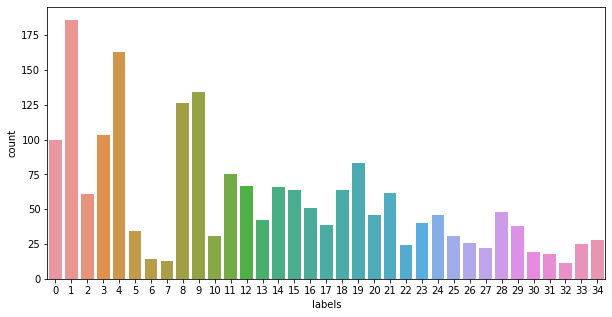

In [41]:
# data visualization
# distribution of labels
plt.figure(figsize=(10, 5))
sns.countplot(x='labels', data=df_copy_gmm)
plt.show()

In [49]:
# silhouette score for each clustering method
from sklearn.metrics import silhouette_score
print('Silhouette Score for k-means clustering is {}'.format(silhouette_score(df, labels_k)))
print('Silhouette Score for agglomerative clustering is {}'.format(silhouette_score(df, labels_agg)))
print('Silhouette Score for DBSCAN clustering is {}'.format(silhouette_score(df, labels_dbscan)))
print('Silhouette Score for Gaussian Mixture Model is {}'.format(silhouette_score(df, labels_gmm)))


Silhouette Score for k-means clustering is 0.7288910344869431
Silhouette Score for agglomerative clustering is 0.7334508003610372
Silhouette Score for DBSCAN clustering is 0.8105168796808293
Silhouette Score for Gaussian Mixture Model is 0.7184037605114593
